In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,InputLayer,BatchNormalization

###Pre Requsites

In [2]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

dataset=tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
print(len(dataset))
train_dataset=dataset.take(int(TRAIN_RATIO*len(dataset)))
print(list(train_dataset.as_numpy_iterator()))

val_dataset=dataset.skip(int((TRAIN_RATIO*len(dataset)))).take(int((VAL_RATIO*len(dataset))))
print(list(val_dataset.as_numpy_iterator()))

test_dataset=dataset.skip(int((TRAIN_RATIO*len(dataset)))).skip(int((VAL_RATIO*len(dataset)))).take(int((TEST_RATIO*len(dataset))))
print(list(test_dataset.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
10
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
[np.int64(8)]
[np.int64(9)]


In [3]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE=len(dataset)

  train_dataset=dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)).take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)).skip(int(VAL_RATIO*DATASET_SIZE)).take(int(TEST_RATIO*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset

In [4]:
train_dataset,val_dataset,test_dataset=splits(dataset,0.7,0.2,0.1)

In [5]:
list(train_dataset.as_numpy_iterator())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6)]

##Data Preparation

###Data Loading

In [6]:
dataset,dataset_info=tfds.load('malaria',
                               with_info=True,
                               as_supervised=True,
                               shuffle_files=True,
                               split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.6JUEG7_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [7]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasit

In [8]:
 for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [9]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [10]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

train_dataset,val_dataset,test_dataset=splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(1))]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

##Data Visualization

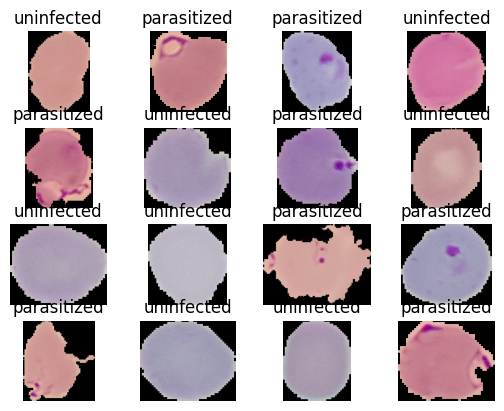

In [11]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [12]:
dataset_info.features['label'].int2str(0)


'parasitized'

###Data Preprocessing

Resizing->normalization

In [13]:
def resizing_rescale(image,label):
  image=tf.image.resize(image,(224,224))
  return image/255.0,label
#resizing the image to 224, 224 and rescaling between 0 to 1

In [14]:
train_dataset=train_dataset.map(resizing_rescale)

In [15]:
val_dataset=val_dataset.map(resizing_rescale)
test_dataset=test_dataset.map(resizing_rescale)

In [16]:
for image,label in train_dataset.take(1):
  print(image.shape)
  print(image,label)

(224, 224, 3)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [17]:
train_dataset=train_dataset.shuffle(buffer_size=8,
                                    reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
val_dataset=val_dataset.shuffle(buffer_size=8,
                                    reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [20]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

##Model Creation


In [21]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(224,224,3)),

    Conv2D(filters=6,kernel_size= 3,strides=1,padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),

    Dense(1000,activation='relu'),
    BatchNormalization(),
    Dense(100,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid'),


])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    46,657,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,762,737 (178.39 MB)

 Trainable params: 46,760,493 (178.38 MB)

 Non-trainable params: 2,244 (8.77 KB)

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=20,verbose=1)

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 62ms/step - accuracy: 0.7260 - loss: 0.5503 - val_accuracy: 0.9122 - val_loss: 0.2264
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.9234 - loss: 0.2077 - val_accuracy: 0.9339 - val_loss: 0.1884
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9392 - loss: 0.1665 - val_accuracy: 0.9372 - val_loss: 0.1892
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9467 - loss: 0.1454 - val_accuracy: 0.9230 - val_loss: 0.2125
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 56ms/step - accuracy: 0.9597 - loss: 0.1121 - val_accuracy: 0.8025 - val_loss: 0.4516
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9543 - loss: 0.1205 - val_accuracy: 0.9256 - val_loss: 0.1968
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9736 - loss: 0.0762 - val_accuracy: 0.9434 - val_loss: 0.1984
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.9809 - loss: 0.0551 - 

<function matplotlib.pyplot.show(close=None, block=None)>

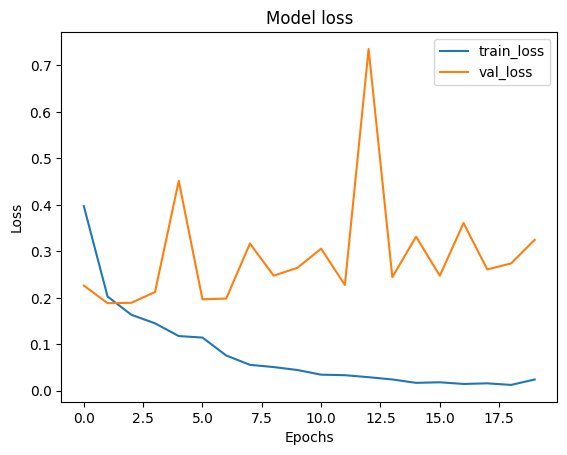

In [24]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'])
plt.show

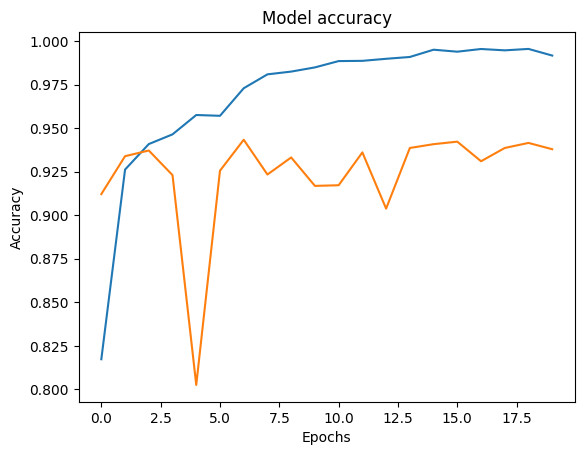

In [25]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step


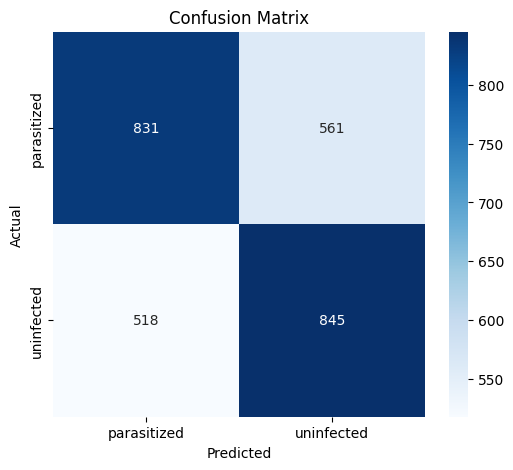


Classification Report:

              precision    recall  f1-score   support

 parasitized       0.62      0.60      0.61      1392
  uninfected       0.60      0.62      0.61      1363

    accuracy                           0.61      2755
   macro avg       0.61      0.61      0.61      2755
weighted avg       0.61      0.61      0.61      2755



In [37]:
# --- Confusion Matrix and Classification Report ---
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on test data
y_pred = model.predict(test_dataset)
# Apply a threshold to the sigmoid output to get binary predictions
y_pred_classes = (y_pred > 0.5).astype("int").flatten()

# Extract true labels from the test_dataset
y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

class_labels = [dataset_info.features['label'].int2str(i) for i in range(dataset_info.features['label'].num_classes)]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

##Model Evaluation

In [26]:
test_dataset=test_dataset.batch(1)

In [27]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [28]:
model.evaluate(test_dataset)

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9312 - loss: 0.3690


[0.37190043926239014, 0.9353901743888855]

In [29]:
model.predict(test_dataset.take(1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


np.float32(0.99999475)

In [30]:
def parasite_or_not(x):
  if x<0.5:
    return 'Parasitized'
  else:
    return 'Uninfected'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


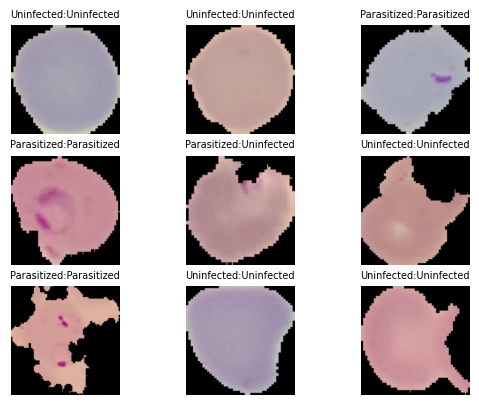

In [31]:
for i, (image,label) in enumerate(test_dataset.take(9)):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title((parasite_or_not(label.numpy()[0]))+":"+parasite_or_not(model.predict(image)[0][0]),fontsize=7)
  plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


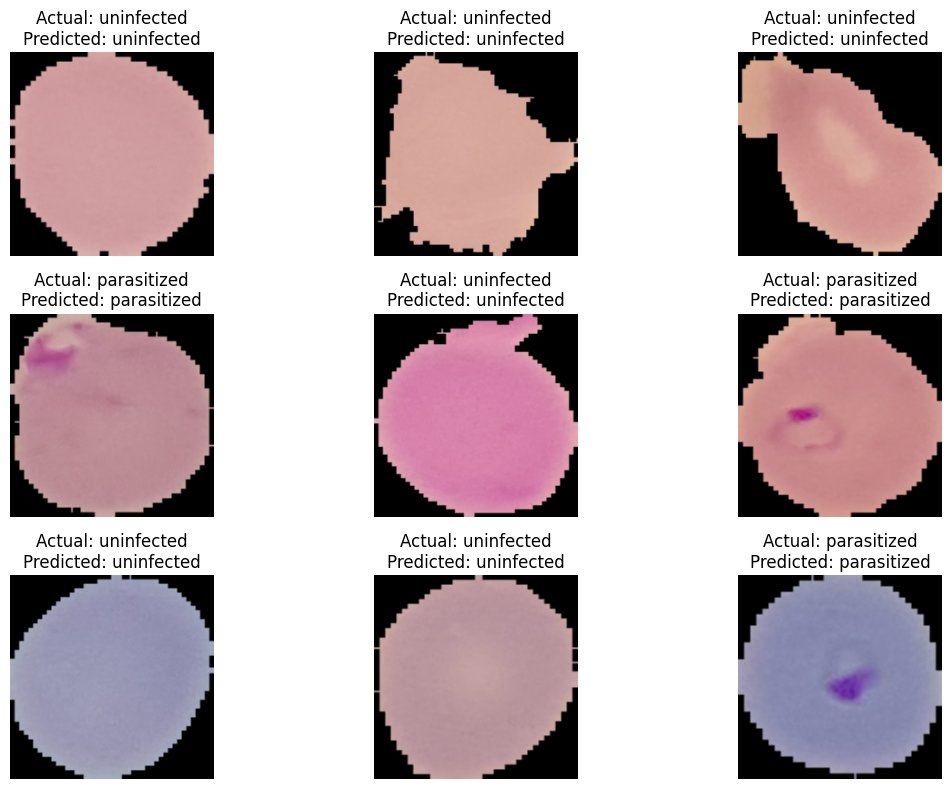

In [38]:
# --- Random Prediction Visualization ---
import random
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(12, 8))

# Get a list of images and labels from the test dataset
test_images = []
test_labels = []
for images, labels in test_dataset.unbatch().take(9): # Take 9 examples for visualization
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

for i in range(9):
    # Select a random image and label
    idx = random.randint(0, len(test_images) - 1)
    img = test_images.pop(idx) # Use pop to avoid duplicates
    label = test_labels.pop(idx)

    # Reshape image for prediction
    img_array = np.expand_dims(img, axis=0)

    # Predict on the image
    pred = model.predict(img_array)
    pred_class = (pred > 0.5).astype("int")[0][0] # Get binary prediction from sigmoid output

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"Actual: {dataset_info.features['label'].int2str(label)}\nPredicted: {dataset_info.features['label'].int2str(pred_class)}")
    plt.axis('off')

plt.tight_layout()
plt.show()